# HW1: Data Exploration and Preparation

includes

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
params ={
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize' : 22,
    'axes.labelsize': 20,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
}
pylab.rcParams.update(params)

## Par1 :Data Loading and First Look

### Q1

In [3]:
data = pd.read_csv('data/virus_data.csv')
data.shape


(1250, 26)

### Q2

In [4]:
data['conversations_per_day'].value_counts()

1     232
2     213
3     191
4     158
5     127
0     117
6      69
7      46
8      34
9      21
10     20
12      7
11      5
13      4
15      3
14      2
16      1
Name: conversations_per_day, dtype: int64

### Q4

In [50]:
training, test = train_test_split(data, test_size=0.2, random_state=182)

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,263,16,F,64.1,A+,"('24.41288', '76.56719')",1,6,2.0,11,...,8.933243,247.230139,96.959642,11.792748,15.306437,3.929300,-214.682711,-56.344700,-1,-1
1,1768,43,M,83.9,O+,"('55.75556', '60.70278')",1,9,6.0,2,...,3.265275,57.421509,80.148318,7.616542,13.694204,5.016285,123.782023,-20.013564,-1,1
2,1374,44,M,101.5,A+,"('-26.93366', '29.24152')",0,8,1.0,3,...,2.014962,188.574377,229.499560,11.877267,-10.522185,4.745999,-65.856248,-24.400732,1,-1
3,1292,22,M,74.6,O+,"('48.78232', '9.17702')",1,6,3.0,1,...,7.941965,171.914488,315.920977,23.848574,-15.782997,4.323900,353.633325,-64.236355,1,1
4,818,10,F,37.9,O+,"('39.78504', '-85.76942')",1,6,1.0,1,...,9.567185,76.922690,215.179195,13.824784,-15.339006,11.384751,-41.861680,-62.901711,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,758,21,M,60.7,O+,"('14.8361', '120.97844')",1,8,2.0,0,...,3.571662,219.648363,278.784345,9.850260,-19.308511,2.401250,-146.794342,-28.138876,-1,-1
1246,1399,56,F,71.6,O-,"('21.59983', '71.21169')",1,10,2.0,5,...,5.326952,189.356073,24.862916,16.304980,-22.435665,1.964091,241.893561,-40.953931,-1,1
1247,791,6,M,40.2,A+,"('19.32932', '-98.1664')",3,6,2.0,2,...,3.565590,53.620132,277.504651,11.676359,11.045784,7.541188,339.752384,-29.070901,1,-1
1248,771,27,M,71.7,O+,"('10.20898', '123.758')",1,9,4.0,1,...,8.408399,283.514910,194.196520,17.831677,-16.242872,9.372432,-256.725748,-59.958494,1,1


## Part2: Warming up with k-Nearest Neighbors

### Q5

#### corelation between *spread* and *PCR_01*

In [6]:
corr_spread_pcr_1 = training['spread'].corr(training['PCR_01'])
print("The corelation between spread and PCR_01 is: ", corr_spread_pcr_1)

The corelation between spread and PCR_01 is:  0.07982951465773408


#### corelation between *spread* and *PCR_02*

In [7]:
corr_spread_pcr_2 = training['spread'].corr(training['PCR_02'])
print("The corelation between spread and PCR_02 is: ", corr_spread_pcr_2)

The corelation between spread and PCR_02 is:  -0.009443954476544473


#### corelation between *spread* and *PCR_03*

In [8]:
corr_spread_pcr_3 = training['spread'].corr(training['PCR_03'])
print("The corelation between spread and PCR_03 is: ", corr_spread_pcr_3)

The corelation between spread and PCR_03 is:  -0.017015901659546737


### Q6

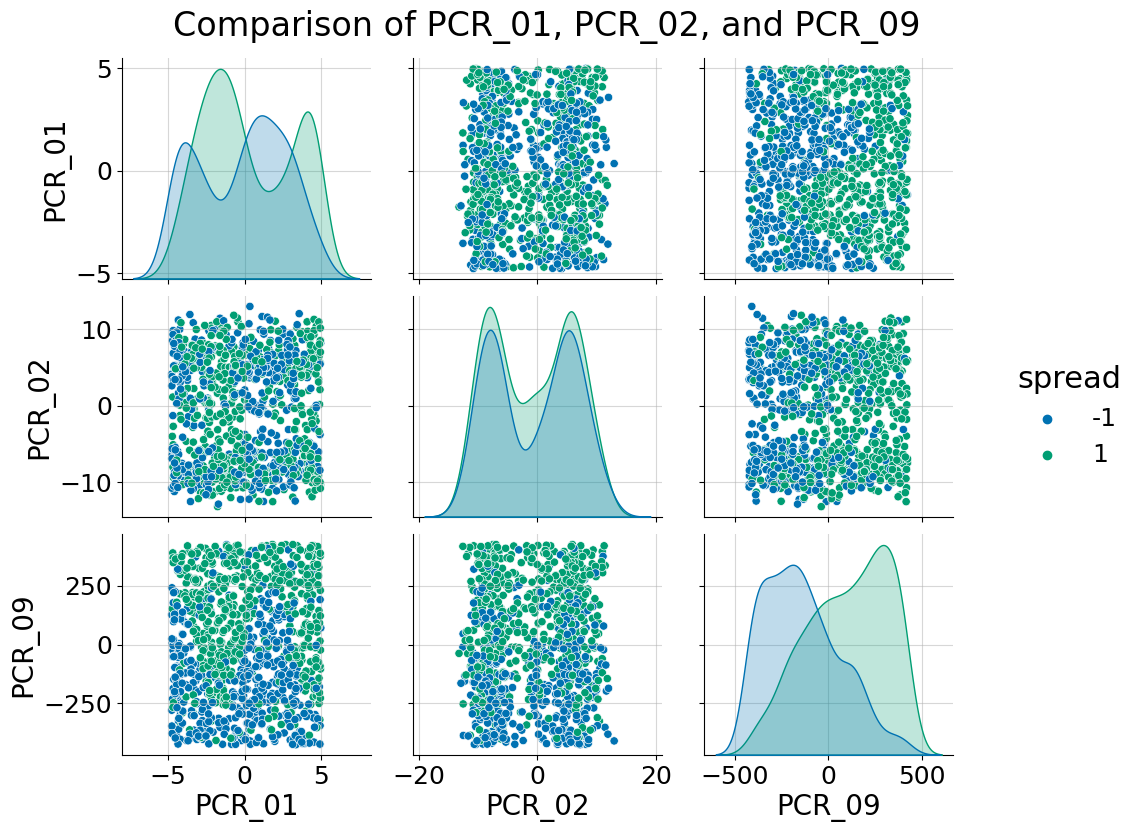

In [9]:
cols_to_compare = ['PCR_01', 'PCR_02', 'PCR_09']
custom_colors = ['#0072B2', '#009E73']
g = sns.pairplot(training, vars=cols_to_compare, hue="spread", diag_kind='kde', palette=custom_colors)
g.fig.suptitle("Comparison of PCR_01, PCR_02, and PCR_09", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

### Q7

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial.distance import cdist

def get_label(label):
    return np.sign(np.sum(label))

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors: int = 3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        return self

    def predict(self, X):
        predictions = None
        if self.X_train is not None and self.y_train is not None:
            dists = cdist(X, self.X_train, metric='euclidean')
            # get the indices of the k nearest neighbors
            k_indices = np.argpartition(dists, self.n_neighbors, axis=1)[
                :, :self.n_neighbors]

            # get the labels of the k nearest neighbors
            k_labels = self.y_train[k_indices]

            predictions = np.apply_along_axis(
                get_label, axis=1, arr=k_labels
            )
        return predictions

In [13]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1, 1]):
        Y = (Y + 1) // 2
        labels = set(Y)

    assert labels == set([0, 1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


### Q8

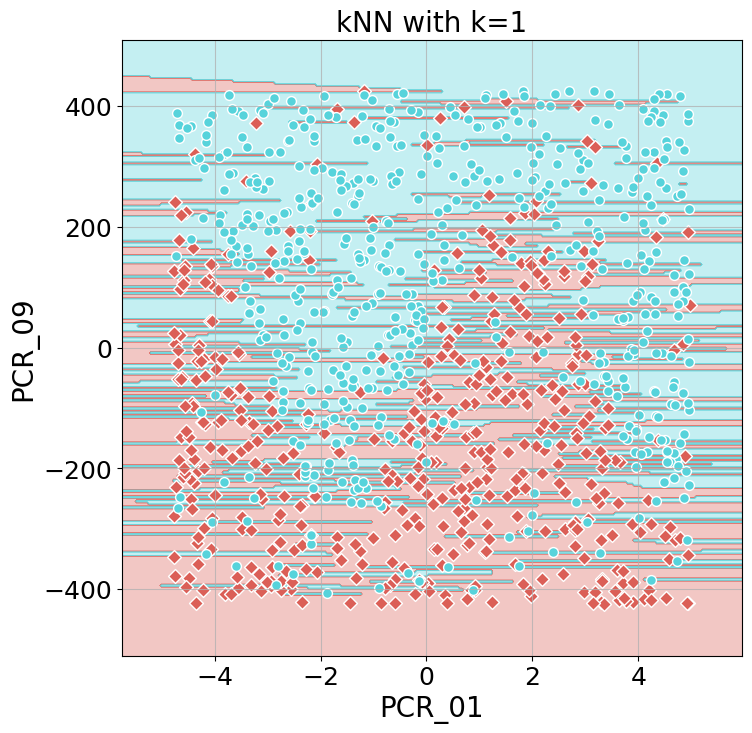

The kNN score on the training set is:  1.0
The kNN score on the test set is:  0.756


In [42]:
temp_data = training[['PCR_01', 'PCR_09']]
knn = kNN(1)
knn.fit(temp_data, training['spread'])
visualize_clf(knn, temp_data, training['spread'], 'kNN with k=1' ,'PCR_01', 'PCR_09')
print("The kNN score on the training set is: ",knn.score(temp_data, training['spread']))

temp_test = test[['PCR_01', 'PCR_09']]
print("The kNN score on the test set is: ",knn.score(temp_test, test['spread']))

### Q9

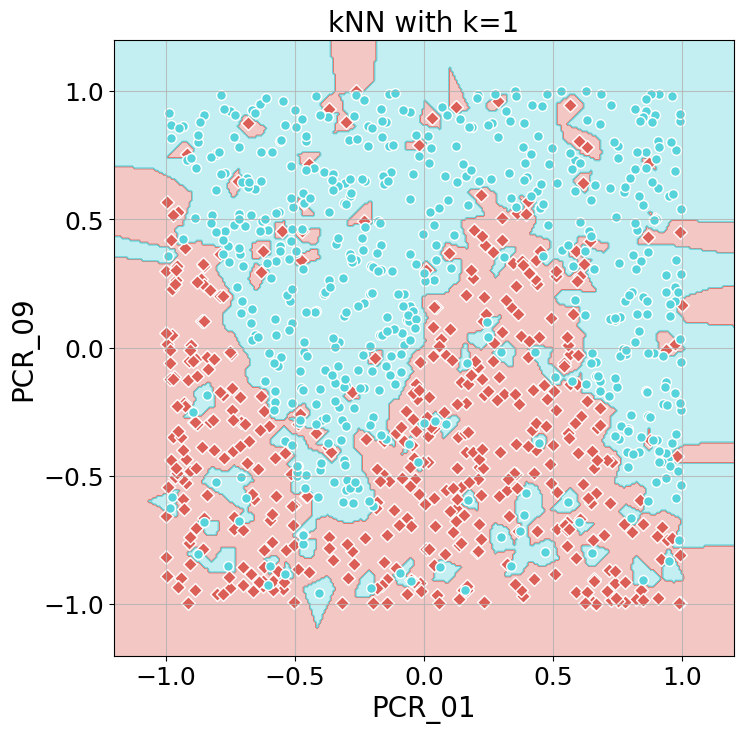

The kNN score on the training set after MinMax normalzing is:  1.0
The kNN score on the training set after MinMax normalzing is:  0.78


In [44]:
temp_data_normalized = MinMaxScaler(feature_range=(-1,1)).fit_transform(temp_data)
knn = kNN(1)
knn.fit(temp_data_normalized, training['spread'])
visualize_clf(knn, temp_data_normalized, training['spread'], 'kNN with k=1' ,'PCR_01', 'PCR_09')
print("The kNN score on the training set after MinMax normalzing is: ",
        knn.score(temp_data_normalized, training['spread']))

temp_data_test_normalized = MinMaxScaler(feature_range=(-1,1)).fit_transform(temp_test)
print("The kNN score on the training set after MinMax normalzing is: ",
        knn.score(temp_data_test_normalized, test['spread']))

### Q10

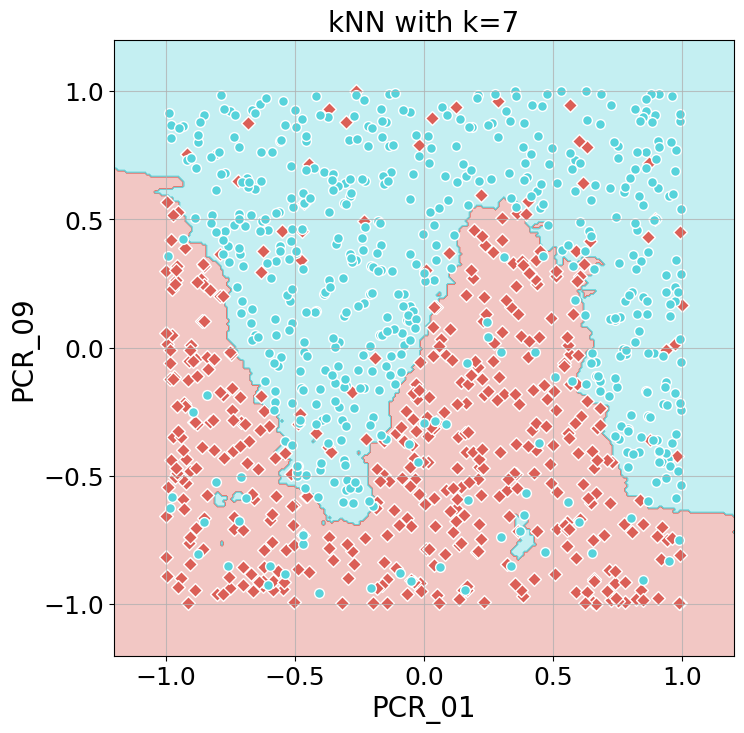

The kNN score on the training set after MinMax normalzing is:  0.884
The kNN score on the test set after MinMax normalzing is:  0.872


In [45]:
knn7 = kNN(7)
knn7.fit(temp_data_normalized, training['spread'])
visualize_clf(knn7, temp_data_normalized, training['spread'], 'kNN with k=7' ,'PCR_01', 'PCR_09')
print("The kNN score on the training set after MinMax normalzing is: ",
        knn7.score(temp_data_normalized, training['spread']))

print("The kNN score on the test set after MinMax normalzing is: ",
        knn7.score(temp_data_test_normalized, test['spread']))


## Part 3: Data Exploration


### Q13

Text(0, 0.5, 'Risk')

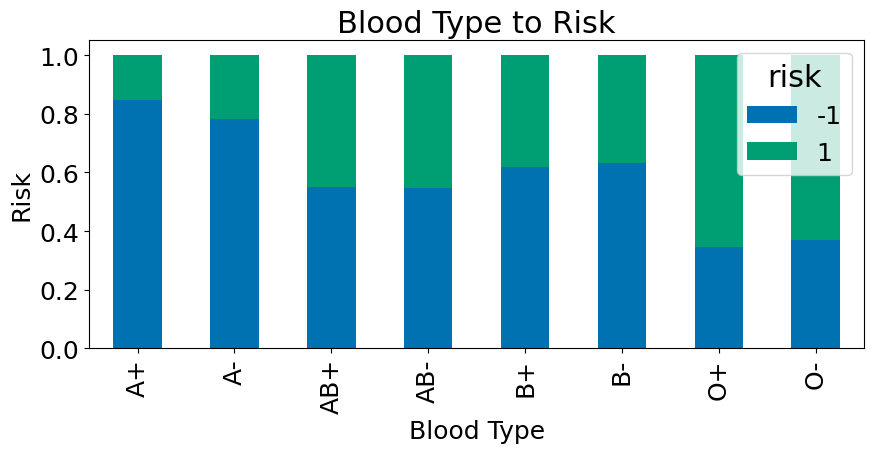

In [54]:
fig, ax1= plt.subplots(ncols=1, sharey=False, figsize=(10,4))
ax1.grid(alpha=0.5)
ax1.set_title("Blood Type to Risk", fontsize=22)
custom_colors = ['#0072B2', '#009E73']
_ = pd.crosstab(training['blood_type'], training['risk'], normalize="index").plot(
                    kind='bar', stacked=True, ax=ax1, color=custom_colors)
ax1.set_xlabel("Blood Type", fontsize=18)
ax1.set_ylabel("Risk", fontsize=18)

### Q14